In [1]:
import pylab as plt 
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
from plotting_utils import add_earth

In [3]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")

    
    if fname:
        plt.savefig(fname)
        plt.close()


In [14]:
df.head()

,Unnamed: 0,x0,y0,z0,vpar0,Btot0,x50,y50,z50,vpar50,...,x400,y400,z400,vpar400,Btot400,x450,y450,z450,vpar450,Btot450
0,0,3.000000,0.000000,0.000000,0.100000,1111.111112,3.500000,0.000000,0.000000,0.100000,...,7.000000,0.000000,0.000000,0.100000,87.463557,7.500000,0.000000,0.000000,0.100000,71.111111
1,1,2.999999,0.000049,0.010000,0.100000,1058.665288,3.499998,0.000066,0.010000,0.100000,...,6.999997,0.000267,0.010000,0.100000,85.705078,7.499997,0.000307,0.010000,0.100000,69.777178
2,2,2.998613,0.000036,0.019892,0.099878,1059.027152,3.498805,0.000088,0.019920,0.099933,...,6.999390,0.000530,0.019980,0.099996,85.716093,7.499430,0.000613,0.019982,0.099997,69.785522
3,3,2.997229,0.000024,0.029772,0.099750,1059.407225,3.497612,0.000110,0.029833,0.099863,...,6.998784,0.000794,0.029959,0.099992,85.727748,7.498863,0.000919,0.029964,0.099994,69.794341
4,4,2.995846,0.000011,0.039639,0.099617,1059.799738,3.496419,0.000132,0.039740,0.099790,...,6.998178,0.001057,0.039938,0.099989,85.739859,7.498296,0.001225,0.039946,0.099991,69.803540


Text(0.5, 1.0, 'Conservation of Energy of Particle Tracer')

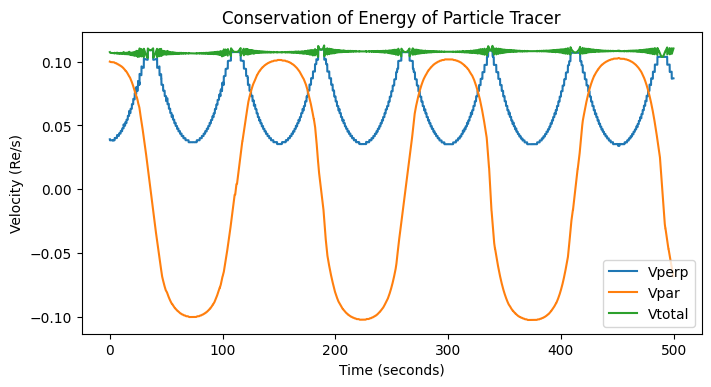

In [44]:
from astropy.constants import R_earth, m_e
from astropy import units

magnetic_moment = 1e-36 * 1e9 * (R_earth**2) * units.A 

vpar = df['vpar50'].values * R_earth / units.s
B = df['Btot50'].values * units.nT
vperp = np.sqrt(magnetic_moment * 2 * B / m_e)
t = df.index * .1

plt.figure(figsize=(8, 4), dpi=100, facecolor='white')
plt.plot(t, vperp.to( R_earth / units.s), label='Vperp')
plt.plot(t, vpar.to( R_earth / units.s), label='Vpar')
plt.plot(t, np.sqrt(vperp**2 + vpar**2).to( R_earth / units.s), label='Vtotal')
plt.legend()
plt.ylabel('Velocity (Re/s)')
plt.xlabel('Time (seconds)')
plt.title('Conservation of Energy of Particle Tracer')


In [10]:
df = pd.read_csv('out.csv')
print(len(df.index))

5000


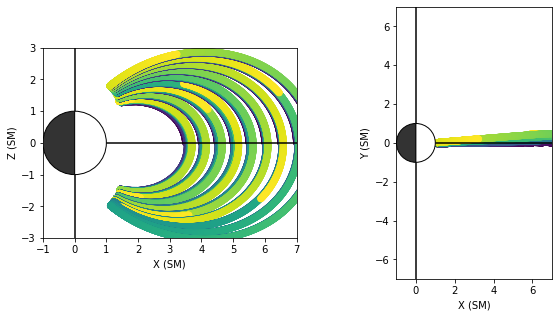

In [11]:
plot(df)

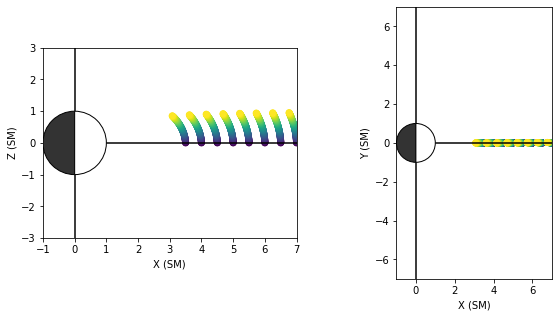

In [6]:
plot(df.iloc[:100])

In [7]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 5000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 10.9min finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,